# **Dwuosobowe gry deterministyczne**
# Wykonawca - Levchenko Sofiia


## Wstęp
Na tym ćwiczeniu zajęliśmy się implementacją algorytmu MinMax z obcinaniem alpha-beta, gdzie dla różnych ruchów z tą samą jakością algorytm zwraca losowy z nich. Następnie należało wykorzystać impelementację algorrytmu do porównania jakości dla różnej głębokości przeszukiwania dla gry Connect Four.



### Wykorzystane narzędzia
W celu *implementacji* wyżej wspomnianego algorytmu, zostały wykorzystane pakie biblioteki jak `numpy` oraz `copy`.

Pierwsza wspomniana biblioteka pozwala na swobodne posługiwanie się podstawowymi metodami obliczeń numerycznych. Biblioteka `copy` natomiast została wykorzystana w celu tworzenia kopii wartości zmiennych (a nie ich położenia w pamięci), w celu uniknięcia nieporządanego zachowania wykorzystywanych zmiennych. 

Kolejne biblioteki, czyli `pandas`, `matplotlib` oraz `tabulate` zostały wykorzystane do *przetworzenia* otrzymanych wyników oraz ich *wizualizacji* w postaci czytelnej dla człowieka.

W dwóch ostatnich linijkach zostały zaimportowane odpowiednie obiekty, niezbędne do przetestowania gry Connect Frour. **Aby się udało dany kod uruchomić, należy załączone pliki connect_four.py, game.py, move.py, player.py oraz state.py umieścić w tym samym katalogu co dany plik .ipynb**

In [1]:
import numpy as np
from copy import copy
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate
from player import Player
from connect_four import ConnectFour, ConnectFourMove

## Implementacja algorytmu
Implementację algorytmu podzieliliśmy na dwie częsci. Najpierw została zimplementowana *funkcja pomocnicza*, która pozwala na obliczenie heurestyki dla danego wykonanego kroku.

### Funkcja heurystyki

Dana funkcja pozwala uzyskać wartość liczbową, reprezentującą jakość dokonanego kroku poprzez sprawdzenie, ile elemntów pod rząd (diagonalnie, horyzontalniee lub wertykalnie) ma gracz "max", a ile gracz "min". Jeżeli gracz max posiada ileś elementów pod rząd to wartość heurestyki jest zwiększana, natosmiast jeżeli je posiada gracz min, to wartość heurestyki jest zmniejszana (im liczba lementtów pod rząd jest większa, tym ta "kara" jest większa)



In [2]:
def heuristic(current_game, isMax):
  heur = 0
  state = current_game.state.fields
  if isMax:
    max_player = current_game.get_players()[0]
    min_player = current_game.get_players()[1]
  else: 
    max_player = current_game.get_players()[1]
    min_player = current_game.get_players()[0]
  for j in range(0, len(current_game.state.fields) - 1):
    for i in range(0, len(current_game.state.fields[j]) - 1):
      try:
        if state[i][j] == state[i+1][j] == max_player:
          heur += 10
        if state[i][j] == state[i+1][j] == state[i+2][j] == max_player:
          heur += 100
        if state[i][j] == state[i+1][j] == state[i+2][j] == state[i+3][j] == max_player:
          heur += 10000

        if state[i][j] == state[i+1][j] == min_player:
          heur -= 10
        if state[i][j] == state[i+1][j] == state[i+2][j] == min_player:
          heur -= 100
        if state[i][j] == state[i+1][j] == state[i+2][j] == state[i+3][j] == min_player:
          heur -= 10000
      except IndexError:
        pass

      try:
        if state[i][j] == state[i][j+1] == max_player:
          heur += 10
        if state[i][j] == state[i][j+1] == state[i][j+2] == max_player:
          heur += 100
        if state[i][j] == state[i][j+1] == state[i][j+2] == state[i][j+3] == max_player:
          heur += 10000

        if state[i][j] == state[i][i+1] == min_player:
          heur -= 10
        if state[i][j] == state[i][j+1] == state[i][j+2] == min_player:
          heur -= 100
        if state[i][j] == state[i][j+1] == state[i][j+2] == state[i][j+3] == min_player:
          heur -= 10000
      except IndexError:
        pass

      try:
        if not j + 3 > len(current_game.state.fields) and state[i][j] == state[i+1][j+1] == max_player:
          heur += 10
        if not j + 3 > len(current_game.state.fields) and state[i][j] == state[i+1][j+1] == state[i+2][j+2] == max_player:
          heur += 100
        if not j + 3 > len(current_game.state.fields) and state[i][j] == state[i+1][j+1] == state[i+2][j+2] == state[i+3][j+3] == max_player:
          heur += 10000

        if not j + 3 > len(current_game.state.fields) and state[i][j] == state[i+1][j+1] == min_player:
          heur -= 10
        if not j + 3 > len(current_game.state.fields) and state[i][j] == state[i+1][j+1] == state[i+2][j+2] == min_player:
          heur -= 100
        if not j + 3 > len(current_game.state.fields) and state[i][j] == state[i+1][j+1] == state[i+2][j+2] == state[i+3][j+3] == min_player:
          heur -= 10000
      except IndexError:
        pass

      try:
        if not j - 3 < 0 and state[i][j] == state[i+1][j-1] == max_player:
          heur += 10
        if not j - 3 < 0 and state[i][j] == state[i+1][j-1] == state[i+2][j-2] == max_player:
          heur += 100
        if not j - 3 < 0 and state[i][j] == state[i+1][j-1] == state[i+2][j-2] == state[i+3][j-3] == max_player:
          heur += 10000

        if not j - 3 < 0 and state[i][j] == state[i+1][j-1] == min_player:
          heur -= 10
        if not j - 3 < 0 and state[i][j] == state[i+1][j-1] == state[i+2][j-2] == min_player:
          heur -= 100
        if not j - 3 < 0 and state[i][j] == state[i+1][j-1] == state[i+2][j-2] == state[i+3][j-3] == min_player:
          heur -= 10000
      except IndexError:
        pass
  return heur

### Funkcja do uzyskania dzieci drzewa decyzyjnego

Kolejną funkcją pomocniczą jest funkcja, która pozwala na tworzenia kopii gry oraz zrobienia określonego kroku, wynik działania danej funkcji odzwierciedla możliwy rozwój gry po wykonaniu każdego z możliwych w danej chwili kroków.

In [3]:
def get_child_nodes(current_game_state):
  children = []
  for move in current_game_state.get_moves():
    child = copy(current_game_state)
    child.make_move(move)
    children.append((move, child))
  return children

### Algorytm MinMax z obcinaniem alfa-beta

In [4]:
def minimax_apha_beta_pruning(current_game_state, depth, player, alpha, beta, isMax):
  moves = current_game_state.get_moves()
  same_best_move = []

  if len(moves) > 1:
    bestMove = moves[np.random.randint(0, len(moves) - 1)]
  elif len(moves) > 0: 
    bestMove = moves[0]
  else: 
    bestMove = None

  if current_game_state.is_finished():
    return -np.inf if isMax else np.inf, None
  elif depth == 0:
    return heuristic(current_game_state, isMax), bestMove

  if isMax:
    bestScore = -np.inf
    shouldReplace = lambda x: x > bestScore
  else:
    bestScore = np.inf
    shouldReplace = lambda x: x < bestScore
  
  shouldAddSameValueMove = lambda x: x == bestScore

  children = get_child_nodes(current_game_state)
  for child in children:
    move, child_game_state = child
    child_player = child_game_state.get_current_player()
    temp = minimax_apha_beta_pruning(child_game_state, depth-1, child_player, alpha, beta, not isMax)[0]
    if shouldAddSameValueMove(temp):
      same_best_move.append(move)
    if shouldReplace(temp):
      same_best_move = []
      same_best_move.append(move)
      bestScore = temp
    if isMax:
      alpha = max(alpha, temp)
    else:
      beta = min(beta, temp)
    if alpha >= beta:
      break
      
  if len(same_best_move) > 1:
    bestMove = same_best_move[np.random.randint(0, len(same_best_move) - 1)]
  elif len(same_best_move) > 0: 
    bestMove = same_best_move[0]

  return bestScore, bestMove

## Implementacja Gry Connect-Four

W danej sekcji zostały zaimplementowane pomocnicze funkcji aby się udało przetestować działanie algorytmu dla wcześnie wspomnianej gry. 

Zostały zaimplementowane 2 funkcji służące do dokonania kroku przez bota o określonej 'jakości" (głębokości przeszukiwania), pierwsza funkcja pozwala na zwykłe "przejście" gry, natomiast druga dodatkowo zbiera informację o wartości heurestyki dla każdego dookonanego kroku w celu dalszej analizy jakości algorytmu

In [5]:
def bot_move(game, max_depth, isMax):
  current_game = copy(game);
  player = game.get_current_player();
  alpha = -np.inf;
  beta = np.inf;
  score, move = minimax_apha_beta_pruning(current_game, max_depth, player, alpha, beta, isMax)
  if move:
    game.make_move(move)

In [6]:
def bot_move_test(game, max_depth, isMax, heur):
  current_game = copy(game);
  player = game.get_current_player();
  alpha = -np.inf;
  beta = np.inf;
  score, move = minimax_apha_beta_pruning(current_game, max_depth, player, alpha, beta, isMax)
  heur.append(score)
  if move:
    game.make_move(move)

Ten kawałek kodu pozwala na jednorazowe uruchomienie gry pomiędzy dwoma botami, w wyniku któregoo jest pokazywanyy snapshoot game board'u dla ostatniego, wygrywającego kroku.

In [9]:
game = ConnectFour()
p1 = Player('a')
p2 = Player('b')
game = ConnectFour(first_player=p1, second_player=p2)
while not game.is_finished():
  bot_move(game, 3, True)
  bot_move(game, 3, False)
print(str(game))

Current player: a
[ ][ ][ ][ ][ ][ ][ ]
[ ][ ][ ][a][ ][ ][ ]
[b][ ][a][a][ ][ ][ ]
[b][ ][b][b][b][a][ ]
[b][b][a][a][a][b][ ]
[b][a][b][a][a][a][b]


## Testowanie algorytmu

### Zdefiniowanie hiperparametrów 

In [20]:
depths = [1, 3, 5, 7, 9]
p1 = Player('a')
p2 = Player('b')

### Jedorazowe uruchomienie algorytmu - ewaluacja wartości heurestyki i jej wpływ na wynik


In [ ]:
heur_p1_2 = []
heur_p2_2 = []
winner_2 = []

W danym kawałku kodu przeprowadzamy iterację po lście z kilkoma głębokościami przeszukiwania aby uzyskać wartość heurestyki dla każdego z dokonanych kroków (dla każdego z botów, zarówna jak "max" tak i "min") oraz informację o tym, kto wygrał daną grę.

In [ ]:
i = 0
while i<len(depths):
  heur_p1_2.append([])
  heur_p2_2.append([])
  winner_2.append([])
  game = ConnectFour(first_player=p1, second_player=p2)
  while not game.is_finished():
    bot_move_test(game, depths[i], True, heur_p1_2[i])
    bot_move_test(game, depths[i], False, heur_p2_2[i])
  if game.get_winner() == p1:
    winner_2[i].append('a')
  elif game.get_winner() == p2:
    winner_2[i].append('b')
  i+=1

Następnie został zwizualizowany wynik uruchomienia algorytmu dla różnych głębokości przeszukiwania. Na każdym z wykresów pokazana jest ewaluacja wartości heurestyki po dokonaniu kroku każdego z botów. 

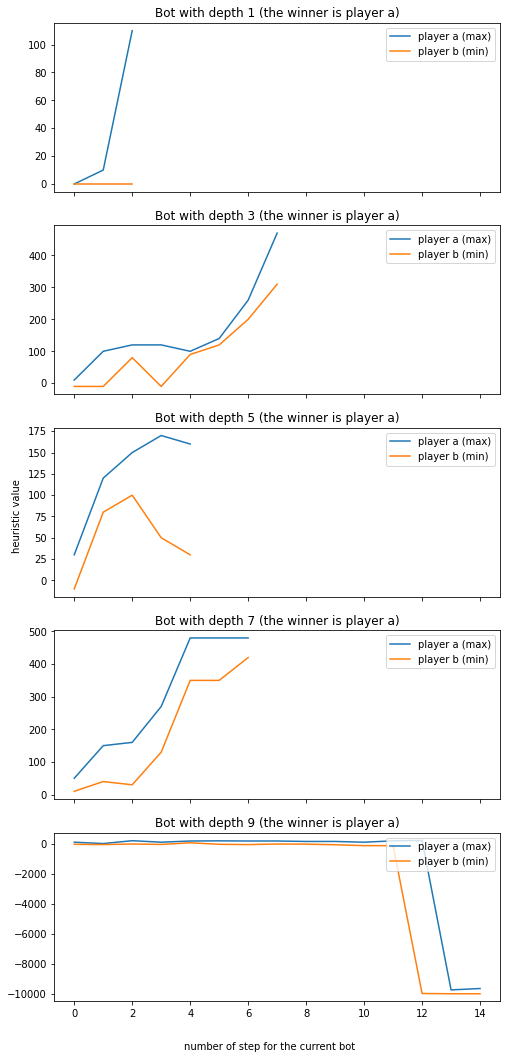

In [ ]:
plt.rcParams["figure.figsize"] = (8,18)

fig, axs = plt.subplots(5, 1, sharex=True)

for j in range(0, len(depths)):
  axs[j].plot(heur_p1_2[j], label="player a (max)")
  axs[j].plot(heur_p2_2[j], label="player b (min)")
  axs[j].set_title('Bot with depth %d (the winner is player %s)' % (depths[j], str(winner_2[j][0])))    
  axs[j].legend(loc='upper right')

fig.text(0.5, 0.09, 'number of step for the current bot', ha='center', va='center')
fig.text(0.06, 0.5, 'heuristic value', ha='center', va='center', rotation='vertical')

plt.show()

Też dana metryka została zwizualizowana w inny sposób - pokazane jest jak zmieniała się wartość heurestyki w czasie bez podziału na gracze. Na każdym z wykresów została narysowana "granica" na poziomie 0, aby pokazać, w jakich momentacj bardziej prawdopodobne byłoo wygranie gracza "max" (kiedy wartośc jest większa od 0), kiedy gracza "min" (wartośc odpowiednio mniejsza od 0).

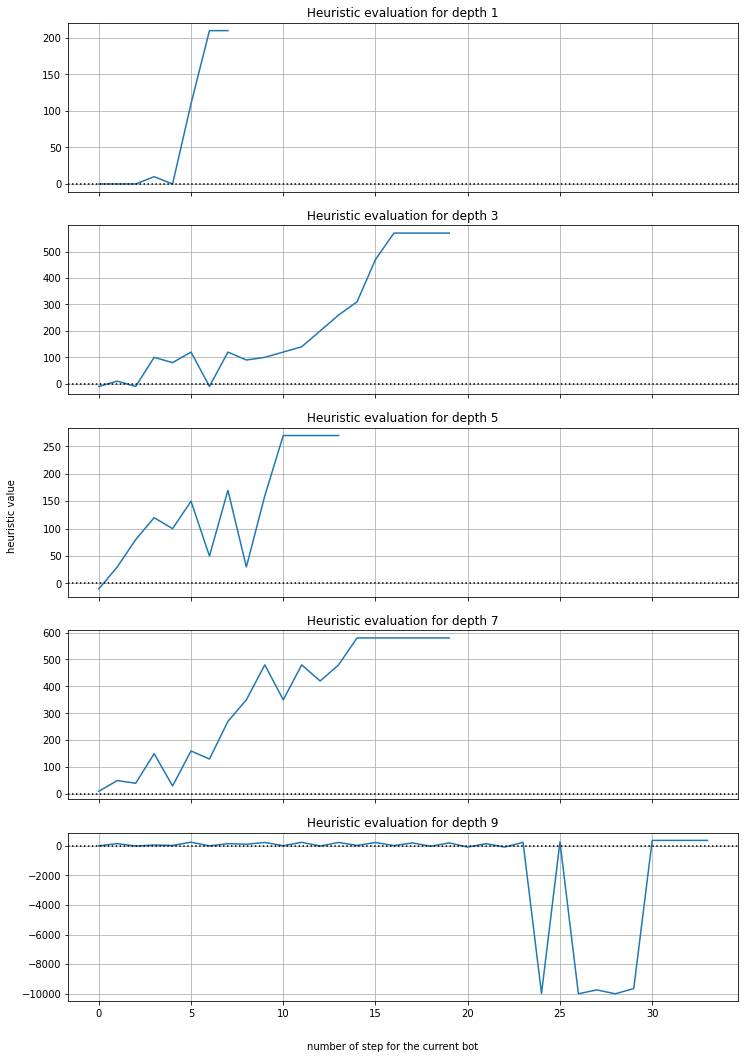

In [ ]:
plt.rcParams["figure.figsize"] = (12,18)

fig, axs = plt.subplots(5, 1, sharex=True)
heur_eval = []

for k in range(0, max(len(heur_p1_2), len(heur_p2_2))):
  heur_eval.append([])
  max_heur = 0
  min_heur = 0
  for i in range(0, len(heur_p1_2[k]) + len(heur_p2_2[k])):
    if i % 2 == 0:
      if heur_p2_2[k][i // 2] == np.inf:
        heur_eval[k].append(max_heur + 100)
      elif heur_p2_2[k][i // 2] == -np.inf:
        heur_eval[k].append(min_heur - 100)
      else:
        if heur_p2_2[k][i // 2] > max_heur:
          max_heur = heur_p2_2[k][i // 2]
        elif heur_p2_2[k][i // 2] < min_heur:
          min_heur = heur_p2_2[k][i // 2]
        heur_eval[k].append(heur_p2_2[k][i // 2])
    else: 
      if heur_p1_2[k][i // 2] == np.inf:
        heur_eval[k].append(max_heur + 100)
      elif heur_p1_2[k][i // 2] == -np.inf:
        heur_eval[k].append(min_heur - 100)
      else:
        if heur_p1_2[k][i // 2] > max_heur:
          max_heur = heur_p1_2[k][i // 2]
        elif heur_p2_2[k][i // 2] < min_heur:
          min_heur = heur_p1_2[k][i // 2]
        heur_eval[k].append(heur_p1_2[k][i // 2])

for j in range(0, len(depths)):
  axs[j].plot(heur_eval[j])
  axs[j].set_title('Heuristic evaluation for depth %d' % depths[j])
  axs[j].grid(True, which='both')
  axs[j].axhline(y=0, color ="black", linestyle =":")

fig.text(0.5, 0.09, 'number of step for the current bot', ha='center', va='center')
fig.text(0.06, 0.5, 'heuristic value', ha='center', va='center', rotation='vertical')

plt.show()

Możemy zaobserwować tendencję "schodkową" dla mniejszych głębokości przeszukiwania oraz tendencję do "walki" (gdzie wartości heurestyli lub bardzo bliskie siebie, lub bardzo oddalone od siebie) dla zdecydowanie większych wartości głębokości przeszukiwania.

Też wyniki zostały zaprezentowane w postaci tabeli, gdzie umieszczone są informacje o głębokości przeszukiwania, ilości kroków których wartość heurestyki byłó większe, równa lub mniejsza zera, liczbie kroków w danej grze oraz informacja o tym, kto wygrał daną grę.

In [ ]:
result = []
for i in range(0, len(depths)):
  max_index = len(heur_p2_2[i]) - 1
  value_0 = 0
  above_0 = 0
  below_0 = 0
  for j in range(0, len(heur_p2_2[i])):
    if heur_p2_2[i][j] > 0:
      above_0+=1
    elif heur_p2_2[i][j] < 0:
      below_0+=1
    else:
      value_0+=1
    if heur_p1_2[i][j] > 0:
      above_0+=1
    elif heur_p1_2[i][j] < 0:
      below_0+=1
    else:
      value_0+=1
  sum = above_0+value_0+below_0
  result.append(np.array([depths[i], int((below_0/sum)*100), int((value_0/sum)*100), int((above_0/sum)*100), sum, winner_2[i][0], heur_p2_2[i][max_index]]))

print(tabulate(result, headers=['Depth', 'Heuristics below 0, [%]', 'Heuristics with value 0, [%]', 'Heuristics above 0, [%]' ,'Number of steps', 'Winner', 'Heuristic value in the end'], tablefmt="fancy_grid"))

Wszystkie wartości heurestyki zostały podzielone na trzy grupy: większe, mniejsze oraz większe zera. Wartości większe od zera komunikują o tym, że w momencie dokonywania kroku, gracz "max" miał lepszą sytuację od gracza "min", wartości mneijsze od zera o tym, że na odwrót, gracz "min" miał lepszą sytuację, a wartośc równa zera mówią o "równowadze" jakości kroków dokonanych przez obu graczy.

Możeny zauważyć, że w większości przypadków wygrywa ten, kto ma lepsze wartości heurestyki przez większość czasu. Jednak też bywają wyjątki. Przykłądowo, kiedy jeden z graczy odnajduję "wygraną" w zakresie swojej głębokości przeszukiwania i zaczyna aktywnie poruszać się w jej kierunku. 

### Wielorazowe uruchomienie algorytmu - histogram wygranych 

Następnie zbadamy statystykę wygranych dla każdej z wyżej wspomnianych głębokości przeszukiwania. W tym celu liczba iteracji została zwiększona do 10.

In [3]:
winner_1 = []
iter = 10

In [37]:
i = 0
while i<len(depths):
  j = 0
  winner_1.append([])
  while j<iter:
    game = ConnectFour(first_player=p1, second_player=p2)
    while not game.is_finished():
      bot_move_test(game, depths[i], True, [])
      bot_move_test(game, depths[i], False, [])
    if game.get_winner() == p1:
      winner_1[i].append('a')
    elif game.get_winner() == p2:
      winner_1[i].append('b')
    j+=1
  i+=1

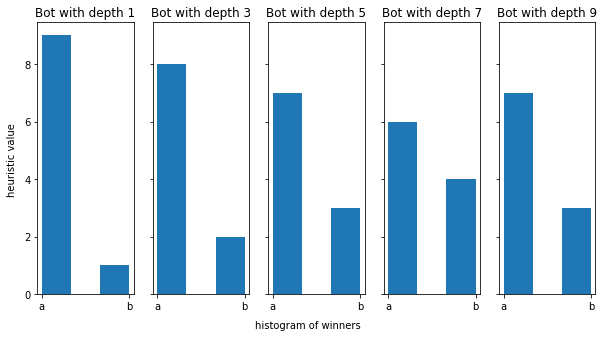

In [19]:
plt.rcParams["figure.figsize"] = (10,5)

fig, axs = plt.subplots(1, 5, sharey=True)

for j in range(0, len(depths)):
  axs[j].hist(winner_1[j], bins=3)
  axs[j].set_title('Bot with depth %d' % depths[j])    

fig.text(0.5, 0.04, 'histogram of winners', ha='center', va='center')
fig.text(0.09, 0.5, 'heuristic value', ha='center', va='center', rotation='vertical')

plt.show()

## Obserwacje i wnioski

W ramach danego ćwiczeniia został zaimplementowany algorytm MinMax z obcinaniem alpha-beta. Dany akgorytm skupia się na przeszukiwaniu (o określonej głębokości) drzewa decyzyjnego i odnajdywaniu najlepszych możliwych do zrobienia kroków. Jakość każdego kroku jest oceniana poprzez pewną funkcję heurestyczną, której wartość jest uzależniona od tego, jak w badanym momencie wygląda stan gry. W przypadku odnajdywania kilku ró∑noważnie dobrych kroków, podeejmowany krok jest wybierany poprzez losowanie.

Zaimplementowany algorytm został przetestowany na grze o nazwie ConnectFour. Przetestowane zostały pięć różnych głębokości przeszukiwania: 1, 3, 5, 7 i 9. Gra została przetestowania na podstawie "gry" dwóch botów o tej samej złożoności (głębokości przeszukiwania, aby każdy krok był tak sano optymalny). Dla każdej z tych wartości, został sporządzony wykres ewaluacji wartości funkcji heurestyki  w funkcji liczby dokonanych kroków. Taka analiza została przeprowadzona jednokrotknie dla każdej z tych wartości. Natomiast analiza wygranych/przegranych już dla 10 prób dla każdej z opcji.

Analizując otrzymane wykresy, udało wyciągnąć takie wnioski:
- przy mniejszych głębokościach przeszukiwania, pierwszy gracz (nasz "maks") w zdecydowanej większości gier wygrywa i przy tym bardzo szybko (po 4-5 krokach), dlatego że ma przewagę w liczbie dokonanych kroków (a przy małych wartościach głębokości przeszukiwania jest to znaczące, jako że wartości heurestyki nie są duże i wtedy każdy z botów głównie skupia się na tym, aby zebrać więcej elementów pod rząd);
- dla co raz większych wartości heurestyki szansa na wygranie drugiego gracza (naszego "min") jest co raz większa, jako że ten gracz zaczyna próbować "blokować" ruchy pierwszego gracza, które mogłyby mu pozwolić wygrać; też możemy zaobserwować (w większości przypadków) wydłużenie czasu trwania gry proporcjonalne do tego, jak się zwiększa głębokość przeszukiwania;
- dla istotnie większych głębokości przeszukiwania pierwszy gracz znowu ma co raz większe prawdopodobieństwo wygrania, z tego powodu, że z natury tej gry, pierwszy gracz ma sporo możliwości do zebrania "czterech pod rząd" jeżeli zaczyna grę od punktu środkowego (co się uda odnaleźć dopiero po przeszukaniu dużej ilości poziomów drzewa), chociaż i czas trwania gry dalej jest co raz dłuższy.

Ze względu na pewnego rodzaju losowość wybieranych kroków (chodzi tutaj o przypadek, gdy mamu kilka równie dobrych opcji) wyniki mogą nieco się różnić dla kolejnych uruchomień algorytmu, jednak wychwycone "tendencje" raczej zostaną niezmiennymmi. 
 
